In [2]:
!pip3 install numpy
!pip3 install matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/75/5b/ca6c8bd14007e5ca171c7c03102d17b4f4e0ceb53957e8c44343a9546dcc/numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 435.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 7.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.12 -m pip install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4c/88/15bbb864b0d871707294ff325f9ffd0dfa486db2637eb34dd5f8dcf5b9bf/matplotlib-3.9.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/51/03/36ecc6fd1d018336625ad91b91fd34cd9ba8da5d36f5e1167dfe3275070a/contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/2621866582.py:6: RuntimeWarning: invalid value encountered in cast
  if point[0,2] == 0:
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:197: RuntimeWarning: invalid value encountered in cast
  offsets = np.asanyarray(offsets, float)


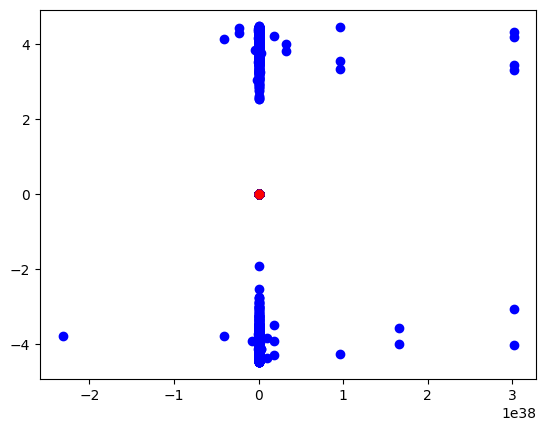

In [12]:
def load_data(file_path):
    return np.fromfile(file_path, dtype=np.float32).reshape(-1, 1, 3)

def visualize_data(data):
    for point in data:
        if point[0,2] == 0:
            plt.scatter(point[0,0], point[0,1], color='red')
        else:
            plt.scatter(point[0,0], point[0,1], color='blue')

data = load_data('RNA-2024.1-PP2.1-Dados/dataAll.txt')
visualize_data(data)

In [14]:


class Perceptron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.random.uniform(-0.5, 0.5, input_dim + 1)
        self.learning_rate = learning_rate
        print(f"Initial weights: {self.weights}")
   
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0
    
    def train(self, training_inputs, labels):
        epoch = 0
        total_adjustments = 0
        while True:
            adjustments = 0
            total_error = 0
            correct_predictions = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                adjustment = self.learning_rate * error
                self.weights[1:] += adjustment * inputs
                self.weights[0] += adjustment
                adjustments += int(adjustment != 0)
                total_error += abs(error)
                correct_predictions += int(prediction == label)
            
            epoch += 1
            total_adjustments += adjustments
            accuracy = correct_predictions / len(labels)
            print(f"Epoch {epoch}: adjustments = {adjustments}, total_error = {total_error}, accuracy = {accuracy:.2f}")
            if adjustments == 0:
                print(f"-=-=-= FINISHED =-=-=-")
                print(f"Final weights: {self.weights}")
                break
        print(f"Total adjustments: {total_adjustments}")
        print(f"Epochs until convergence: {epoch}")

    def train(self, training_inputs, labels):
        epoch = 0
        total_adjustments = 0
        while True:
            adjustments = 0
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                adjustment = self.learning_rate * (label - prediction)
                self.weights[1:] += adjustment * inputs
                self.weights[0] += adjustment
                adjustments += int(adjustment != 0)
            epoch += 1
            total_adjustments += adjustments
            if adjustments == 0:
                break
        print(f"Total adjustments: {total_adjustments}")
        print(f"Epochs until convergence: {epoch}")

# Load dataRNA-2024.1-PP2.1-Dados
data = load_data('RNA-2024.1-PP2.1-Dados/dataAll.txt')

# Train Perceptron
p = Perceptron(input_dim=2)
p.train(data[:,0,0:2], data[:,0,2])

# Visualize decision boundary
x = np.linspace(min(data[:,0,0]), max(data[:,0,0]), 10)
y = -(p.weights[0] + p.weights[1] * x) / p.weights[2]
plt.plot(x, y, '-r')
plt.show()

Initial weights: [ 0.04021124 -0.49954982 -0.15249202]


/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3241481591.py:47: RuntimeWarning: overflow encountered in multiply
  self.weights[1:] += adjustment * inputs
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3241481591.py:46: RuntimeWarning: invalid value encountered in cast
  adjustment = self.learning_rate * (label - prediction)
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3241481591.py:8: RuntimeWarning: invalid value encountered in cast
  summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
/var/folders/60/kvk_xv6j1t34xnqqyt6bdhmm0000gn/T/ipykernel_14921/3241481591.py:47: RuntimeWarning: invalid value encountered in multiply
  self.weights[1:] += adjustment * inputs
